<a href="https://colab.research.google.com/github/QuantumAlg0rithm/High-school/blob/main/%EB%8B%A8%EC%B6%95_URL_%EB%B0%8F_QR_%EC%BD%94%EB%93%9C_%EC%83%9D%EC%84%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🔶단축 URL 및 QR 코드 생성_11109 신주영

평소에 너무 긴 URL를 SNS 등에 공유할 때 화면이 지저분해진다는 문제점이 생각났다. 
그래서 네이버 개발자 센터에서 API를 찾다가 단축 URL API가 있어 사용하게 되었다. 

그리고 이 코드를 QR코드로 만드는 기능을 결합하였다. 

이는 강연, 발표 등을 할 때 온라인 참여 활동이나 설문조사를 온라인으로 할 시 PPT등에 이 QR코드를 추가해놓으면 보다 효율적으로 사용할 수 있다. 

혹은 요즘에는 별로 안 보이지만 전단지에 가게 웹사이트(혹은 네이버에 올라가 있는 가게 정보)등을 QR로 변환해 넣어놓으면 사람들이 전단지를 받고 보통 '아 나중에 한번 검색해 봐야지'라고 잊히는 경우가 많는데, 이를 QR코드 사용하면 그냥 카메라를 켜서 들어가기만 하면 되니 마케팅적으로 큰 효과를 얻을 수 있을 것이다. 

아쉬운 점은 네이버 단축 URL API가 하루에 25000번만 사용 가능하다는 것이다. 개인이 사용할 때는 충분하지만 기업적으로 사용할 때는 다른 방법을 찾아야 할 듯하다.

1️⃣ 첫 번째 코드 

네이버 개발자 센터(NAVER Developers)에서 '단축 URL' API 사용 

입력받은 URL를 API를 사용하여 값은 받은 후 split 함수를 사용하여 단축 URL부분만 추출해 'change_url' 변수에 넣어 놓는다. 

2️⃣ 두 번째 코드 

'단축 URL' API로 뽑아낸 url뒤에. qr를 붙이면 qr코드 이미지로 사용 가능하다는 특징이 있다. 
그래서 'qr_url'변수에 'change_url' 변수와. qr를 합쳐 저장한다. 
구글에서 서치한 OpenCV로 온라인 이미지를 바로 여는 코드를 활용하여 'qr_url'를 출력한다.

✅ 사용방법 
1. 단축하고 싶은 URL를 복사해주세요. 
2. 첫 번째 코드를 실행시킨 후 URL를 붙여 넣기 혹은 입력해 주세요. 
3. 필요시 메모를 입력해 주세요.(아무것도 입력하지 않고 엔터를 누르셔도 됩니다) 
4. 첫 번째 코드 실행이 완료되면, 두 번째 코드를 실행 시면 됩니다. 
5. 출력 결과 링크 또는 QR코드(우클릭 후 저장 가능)를 사용하시면 됩니다.

In [ ]:
import os
import sys
import urllib.request
client_id = "mkvZHc8ii_Y89f7hYxJi" # 개발자센터에서 발급받은 Client ID 값
client_secret = "O2389Q9Anu" # 개발자센터에서 발급받은 Client Secret 값

print('단축할 주소를 입력해 주세요.')
in_url = input()
memo = input('\n필요시 메모를 입력해 주세요 : ')

encText = urllib.parse.quote(in_url)
data = "url=" + encText
url = "https://openapi.naver.com/v1/util/shorturl"
request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
response = urllib.request.urlopen(request, data=data.encode("utf-8"))
rescode = response.getcode()
if(rescode==200):
    response_body = response.read()
    out_url = response_body.decode('utf-8')
    out_url = out_url.split('"')        # 결과에서 필요없는 부분 분리
    change_url = out_url[5]             # 필요한 값 추출

else:
    print("Error Code:" + rescode)

단축할 주소를 입력해 주세요.
https://post.naver.com/viewer/postView.naver?volumeNo=33099540&memberNo=30808112&navigationType=push

필요시 메모를 입력해 주세요 : 스파이더맨, 다중우주


스파이더맨, 다중우주
https://me2.do/FaZpOFXp



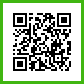

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import urllib.request

def url_to_image(url):
  resp = urllib.request.urlopen(url)
  image = np.asarray(bytearray(resp.read()), dtype='uint8')
  image = cv2.imdecode(image, cv2.IMREAD_COLOR)

  return image

qr_url = change_url + ".qr"   # qr코드 만들기
qr_image = url_to_image(qr_url)

print(memo)
print(change_url + '\n')
cv2_imshow(qr_image)